Milestone 4 - Analysis
Q1: As described in the notebook below, we decided to tune our Polynomial Regression model from Milestone 3 by adjusting hyper parameters and that led us to create multiple new models. From our tuning, we realized that degree 1 polynomial regression, or linear regression, provided the best results given its evaluation metrics on RMSE, MAE, and R^2 but still showed signs of overfitting, for example how its test RMSE was still high than its train RMSE, so we decided to generate 2 more models: Lasso and Ridge Regression in order to regularize and prevent overfitting our data. After tuning our two new models with a range of alpha values for regularization, we found the most optimal alpha values for each of them and were able to signficantly improve our model performance by severely minimizing the test RMSE and other metrics compared to the train. As shown in the graphs, plots, and charts produced after, there was a significant improvement in model performance with Lasso and Ridge regression with Ridge regression providing the best results with an alpha tuning of 0.08. Furthermore, we decided to compare this with other models such as a Random Forest Model and an SVR model. After tuning both models through hyper parameter tuning, we printed out the evaluation results and analyzed the comparison between all the models(linear, lasso, ridge, random forest, and SVR).

Q2: For our three models, we had generally low differences in our training versus testing error. First for the Lasso model, when looking at the averages of our RMSEs we saw that for the training data, we had an RMSE of 0.156786 and a test RMSE of 0.381917. Considering that these are the averages they don't show many signs of overfitting as Lasso has built in regularization. Now looking at Ridge, we saw an average train RMSE of 0.03902 and an average test RMSE of 0.090765. Again Ridge has built-in regularization so the fact that there weren't signs of overfitting was a good reassurance that this model was a good selection. For SVR we had a training RMSE of 0.620019 and a test RMSE of 1.761308. For Random Trees we saw an average train RMSE of 0.1274 and an average test RMSE of 0.9109. Finally, for our improved Polynomial Regression, we had a training RMSE of 0.0349 and a test RMSE of 0.1242. This was much better than our overfit Polynomial Regression model from Milestone 3.  

Q3: The Lasso model fits the data well, with minimized overfitting as seen in our error metrics. However, this model is able to lose some of the complexity of the data, using a model like ElasticNet could be interesting. For Ridge, we again saw that it was pretty balanced and able to generalize without overfitting the data. I think next time we could also consider Gradient Boosting. For SVR, . For Random Trees, in our model, we saw that there were some signs of overfitting with the error being lower for the training set. This could be because there wasn't as much regularization involved. Overall, to improve any potential overfitting we can use other techniques to regularize our data in the preprocessing step and minimize any residual overfitting. With regularization penalizing large coefficients, we can hope to lower any overfitting that does occur.

Milestone 4 Conclusion:
Overall for this milestone, we wanted to really focus on hyperparameterization and preventing overfitting. We were able to parse through the best hyperparameters for each of the three models that we chose and regularize the data when necessary. The benefit of using Lasso and Ridge is that they have built-in regularization using the L1 and L2 regularization. When looking at Random Trees, using the tree structure with the separate samples and features per leaf node allows for us to reduce the change of overfitting and get a more robust model that can perform well on test sets. For SVR, the benefit is using things like Standard Scalar in order to standardize the data to combat the potential for overfitting. The name of the game for us was dialing in the hyper parameterization and we were able to do this with looping over certain key parameters and then with more complex methods like GridSearchCV. We were able to use our features to more accurately make better predictions about stock price. In Milestone 3, we came up short with the Polynomial Regression that we had, however, for this Milestone, we were able to make lots of improvements in our predictions by way of using models that were better suited for our dataset.

# Data Preprocessing
In our preprocessing step, we filter our data to first select only numerical features which we can use for regression. Then, we calculate each features correlation with the 'close' feature, which is what our model aims to predict. We only use features that have a correlation value of greater than 0.6, as we want to use a minimal set of important features to prevent overfitting. We handle missing data by filling it in with the column's median values as opposed to mean due to the presence of outliers in the data. Additionally, depending on the feature, we use standardization or min-max scaling.

In [31]:
# Imports and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df_original = pd.read_csv('infolimpioavanzadoTarget.csv')

In [32]:
# Data Filtering

numerical_features = df_original.select_dtypes(include=['float64', 'int64']).columns
close_correlation = df_original[numerical_features].corr()['close'].drop('close')
high_correlation_features = close_correlation[close_correlation.abs() > 0.6]
df = df_original[['date', 'ticker', 'close'] + high_correlation_features.index.tolist()]

df['date'] = pd.to_datetime(df['date'])

<ipython-input-32-a14e1c10c5f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [33]:
# Handle missing data
median_imputer = SimpleImputer(strategy='median')
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = median_imputer.fit_transform(df[num_cols])

<ipython-input-33-25922a8ec760>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = median_imputer.fit_transform(df[num_cols])


In [34]:
# Feature Scaling
standard = ['open', 'vwapadjclosevolume', 'atr5', 'atr10', 'atr15', 'atr20']
min_max = ['open', 'high', 'low', 'low-5', 'high-5', 'low-10', 'high-10', 'low-15', 'high-15']

In [35]:
# Fit the scalers on the entire dataset for consistency
stdScaler = StandardScaler()
minMaxScaler = MinMaxScaler()

df[standard] = stdScaler.fit_transform(df[standard])
df[min_max] = minMaxScaler.fit_transform(df[min_max])

<ipython-input-35-e1cfd55cecbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[standard] = stdScaler.fit_transform(df[standard])
<ipython-input-35-e1cfd55cecbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[min_max] = minMaxScaler.fit_transform(df[min_max])


# Polynomial Regression (Revisited)
In Milestone 3 we used polynomial regression, however, we did not sufficiently address hyperparameter tuning. We are reintroducing polynomial regression here to show how hyperparameter tuning, specifically changing the degree, impacts our model performance. Therefore, when we introduce new models here in milestone 4, we can more accurately compare the performance of polynomial regression and our new models.

We use polynomial regresision to make 'close' price predictions for each specific ticker symbol in our data set (each ticker correlates to a unique company in the stock market). We run our model on all tickers and display the overall results, but for ease of visualization, we provide graphs only showing results for just 3 tickers: ASML, ASTL, and ASRV. We use hyperparameter tuning and here as we test our polynomial regression model for different degrees(1, 2 and 3). We want to find which polynomial degree results in the lowest RMSE on our test data, while considering the risk of overfitting as we increase the polynomial degree. Furtheremore we plot fitting graphs, bar charts, and box plots for analysis.

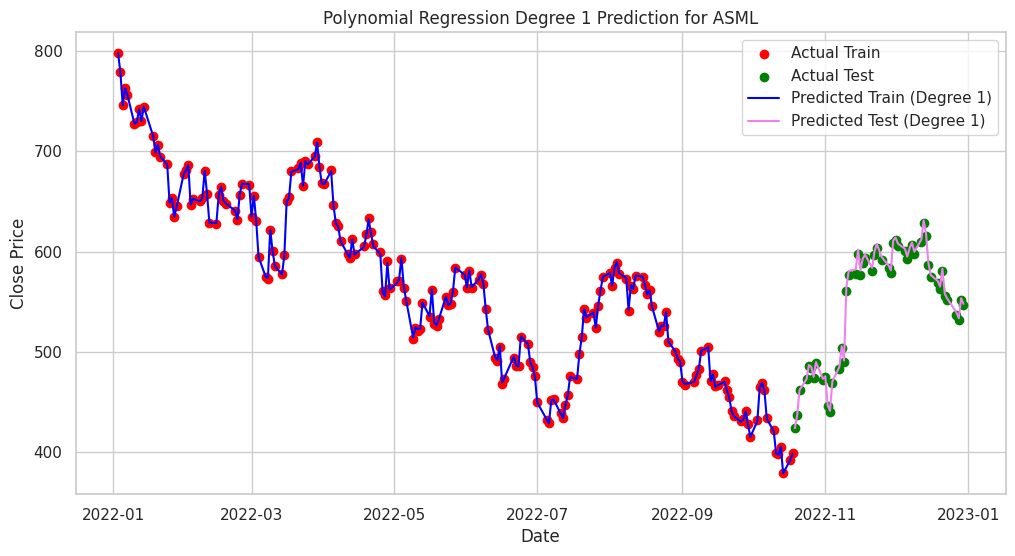

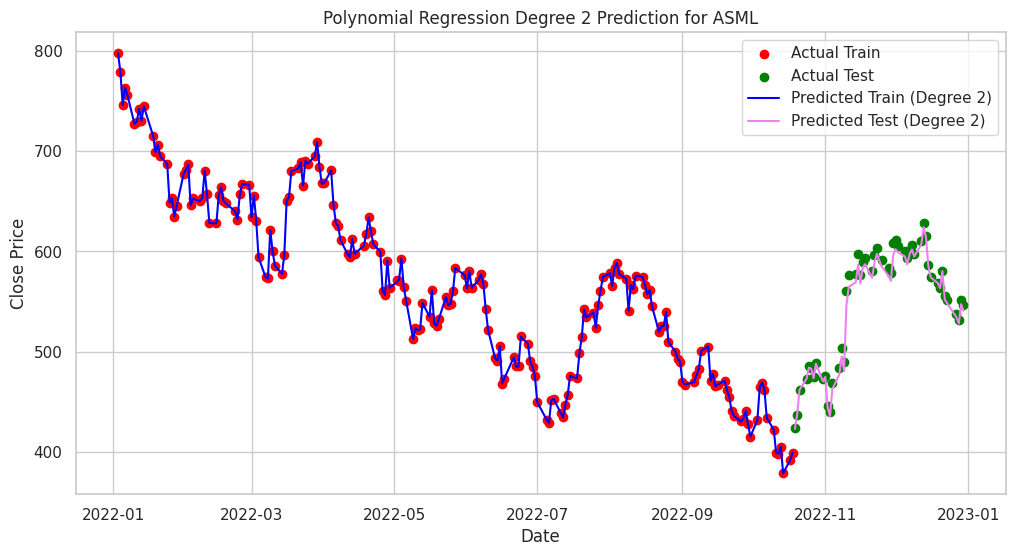

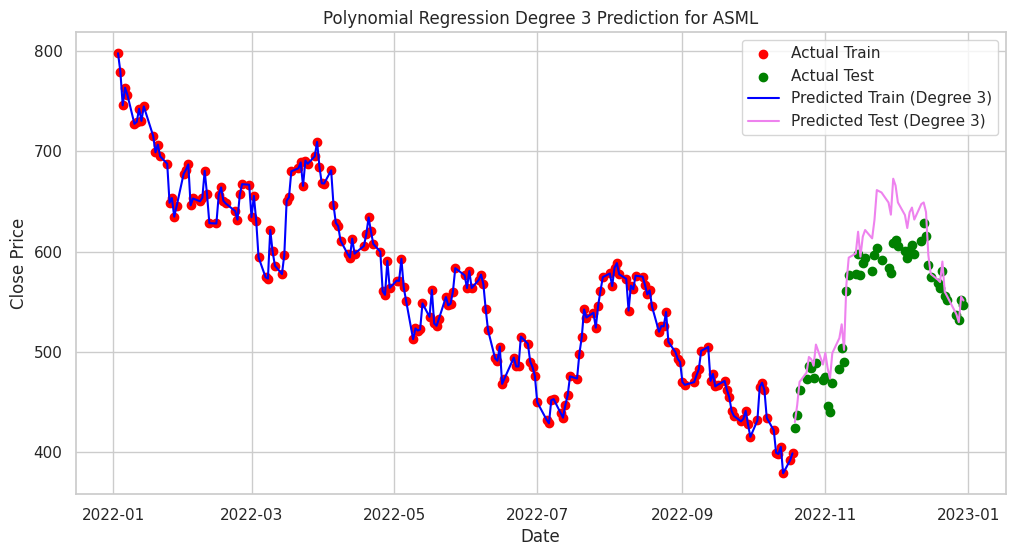

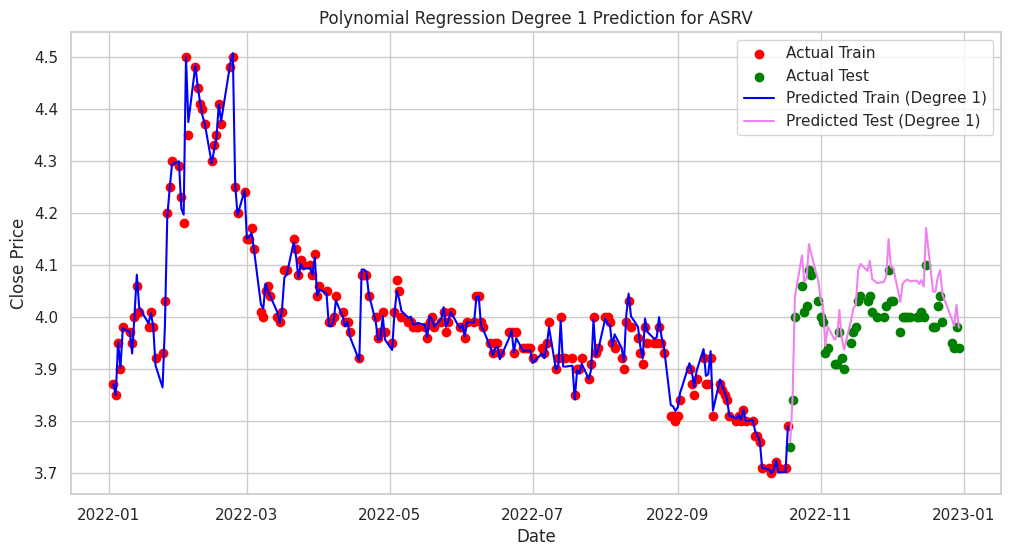

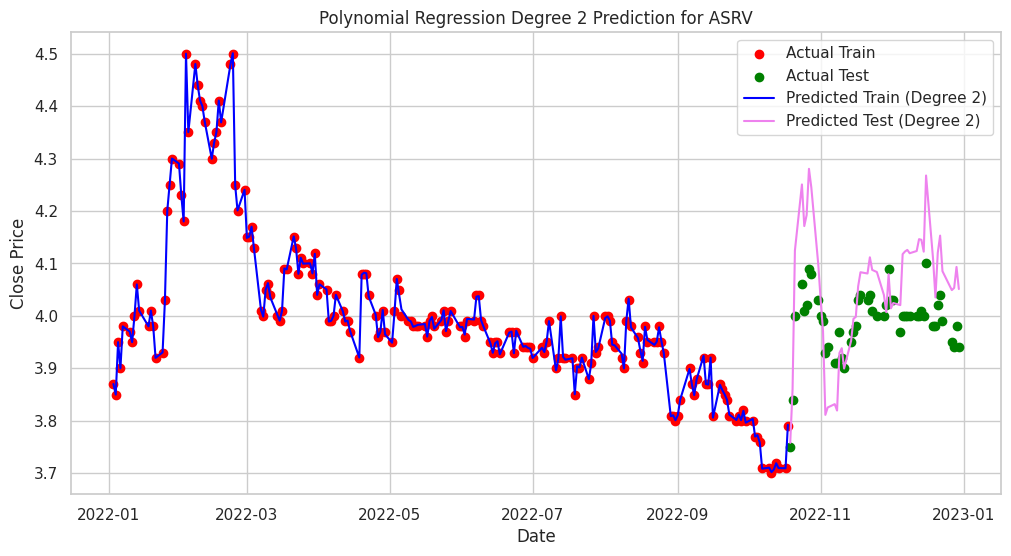

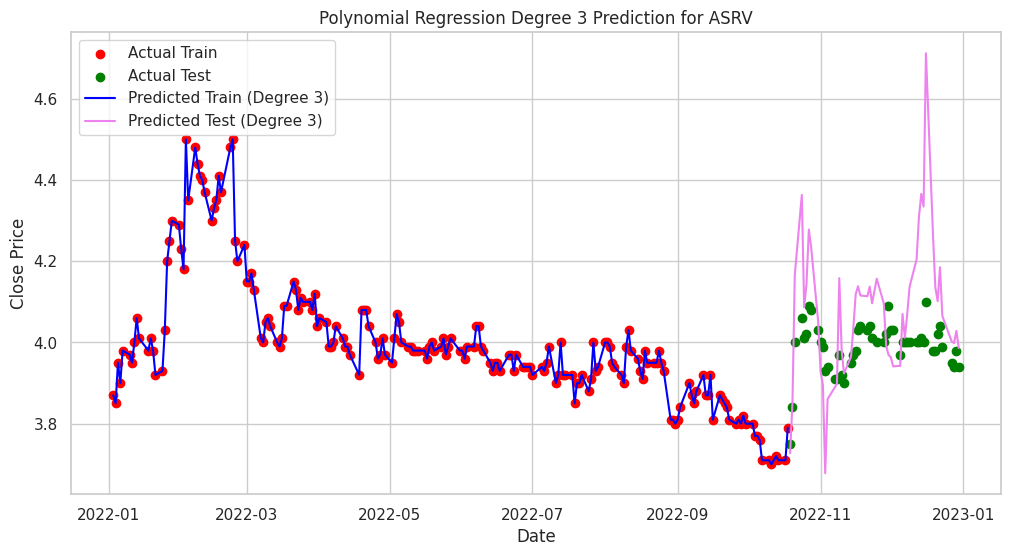

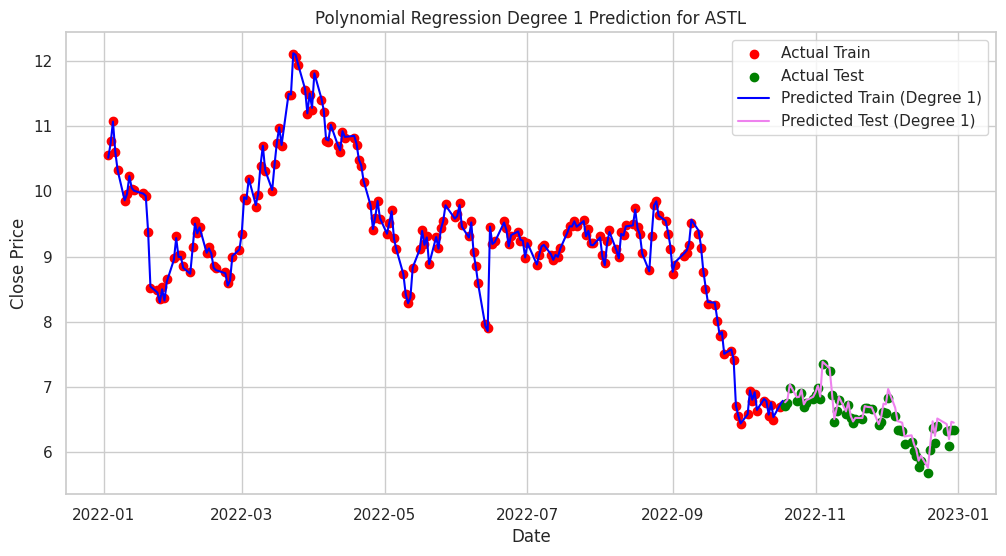

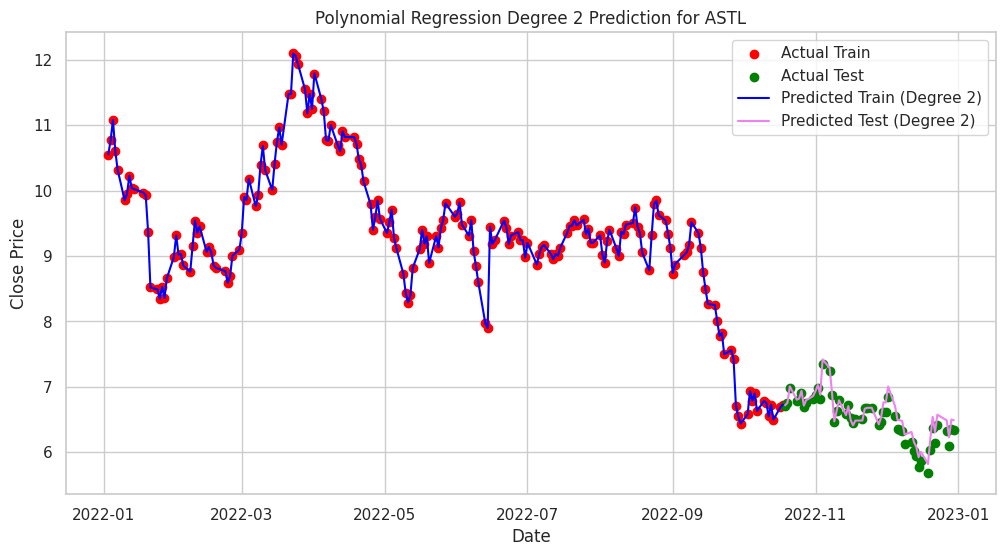

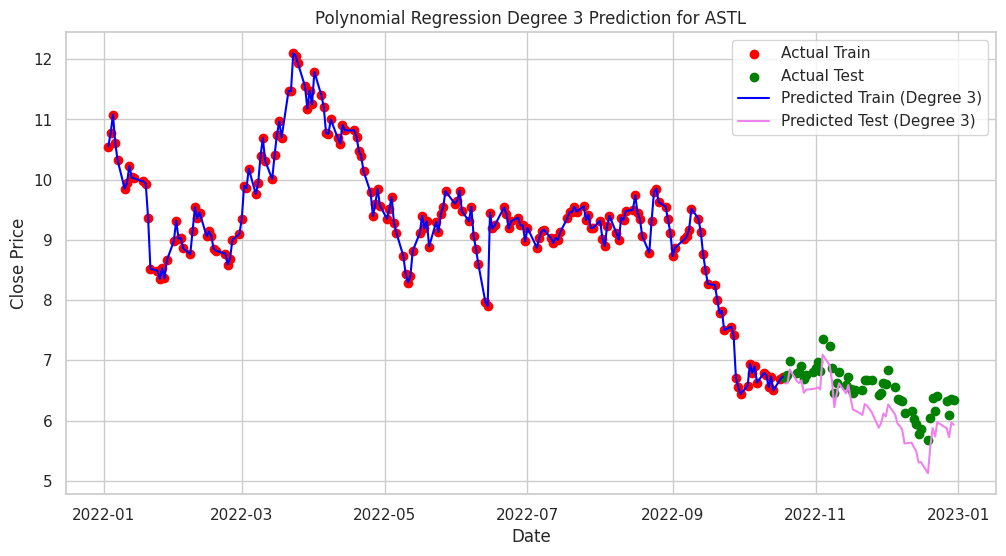

Evaluation Results for ASML:

Polynomial Degree 1:
  Train RMSE: 0.7020
  Test RMSE: 2.4659
  Train MAE: 0.5329
  Test MAE: 2.1579
  Train R2: 0.9999
  Test R2: 0.9982

Polynomial Degree 2:
  Train RMSE: 0.2202
  Test RMSE: 5.8476
  Train MAE: 0.1353
  Test MAE: 4.6275
  Train R2: 1.0000
  Test R2: 0.9897

Polynomial Degree 3:
  Train RMSE: 0.0000
  Test RMSE: 29.7993
  Train MAE: 0.0000
  Test MAE: 23.6733
  Train R2: 1.0000
  Test R2: 0.7329

--------------------------------------------------

Evaluation Results for ASRV:

Polynomial Degree 1:
  Train RMSE: 0.0116
  Test RMSE: 0.0537
  Train MAE: 0.0086
  Test MAE: 0.0514
  Train R2: 0.9946
  Test R2: 0.2158

Polynomial Degree 2:
  Train RMSE: 0.0022
  Test RMSE: 0.0996
  Train MAE: 0.0015
  Test MAE: 0.0834
  Train R2: 0.9998
  Test R2: -1.6990

Polynomial Degree 3:
  Train RMSE: 0.0000
  Test RMSE: 0.1645
  Train MAE: 0.0000
  Test MAE: 0.1211
  Train R2: 1.0000
  Test R2: -6.3691

--------------------------------------------------

In [36]:
# HYPER PARAMETER TUNING FOR POLYNOMIAL REGRESSION(SPOILER: THE BEST MODEL IS OF DEGREE 1)
selected_tickers = ['ASML', 'ASRV', 'ASTL']

degrees = [1, 2, 3]
evaluation_results = {}
avgNum = {}
for degree in degrees:
  if degree not in avgNum:
        avgNum[degree] = {}
  avgNum[degree]['Train RMSE'] = 0
  avgNum[degree]['Test RMSE'] = 0
  avgNum[degree]['Train MAE'] = 0
  avgNum[degree]['Test MAE'] = 0
  avgNum[degree]['Train R2'] = 0
  avgNum[degree]['Test R2'] = 0

# Iterate over each ticker
for ticker in selected_tickers:
    ticker_df = df[df['ticker'] == ticker].copy()

    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)

    # Splitting data into features and target
    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    split_index = int(len(X) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    # Iterate over each degree
    for degree in degrees:

        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = polynomial.fit_transform(X_train)
        X_test_poly = polynomial.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # Evaluating the data, to be printed later
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        #add it to average count
        avgNum[degree]['Train RMSE'] += train_rmse
        avgNum[degree]['Test RMSE'] += test_rmse
        avgNum[degree]['Train MAE'] += train_mae
        avgNum[degree]['Test MAE'] += test_mae
        avgNum[degree]['Train R2'] += train_r2
        avgNum[degree]['Test R2'] += test_r2

        # Store evaluation results
        model_name = f'Polynomial Degree {degree}'
        if ticker not in evaluation_results:
            evaluation_results[ticker] = {}
        evaluation_results[ticker][model_name] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Train MAE": train_mae,
            "Test MAE": test_mae,
            "Train R2": train_r2,
            "Test R2": test_r2
        }


        plt.figure(figsize=(12, 6))
        plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red')
        plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green')
        plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred, label=f'Predicted Train (Degree {degree})', color='blue')
        plt.plot(ticker_df['date'].iloc[split_index:], y_test_pred, label=f'Predicted Test (Degree {degree})', color='violet')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.title(f"Polynomial Regression Degree {degree} Prediction for {ticker}")
        plt.legend()
        plt.show()


avgNum[degree]['Train RMSE'] = avgNum[degree]['Train RMSE']/3
avgNum[degree]['Test RMSE'] = avgNum[degree]['Test RMSE']/3
avgNum[degree]['Train MAE'] = avgNum[degree]['Train MAE']/3
avgNum[degree]['Test MAE'] = avgNum[degree]['Test MAE']/3
avgNum[degree]['Train R2'] = avgNum[degree]['Train R2']/3
avgNum[degree]['Test R2'] = avgNum[degree]['Test R2']/3

# Print evaluation results for all tickers
for ticker in evaluation_results:
    print(f"Evaluation Results for {ticker}:")
    for model_name, metrics in evaluation_results[ticker].items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.4f}")
    print("\n" + "-"*50 + "\n")

print(f"Average Evaluation Results for all tickers:")
for degree in avgNum:
    print(f"\n{degree}:")
    for metric_name, value in avgNum[degree].items():
        print(f"  {metric_name}: {value:.4f}")

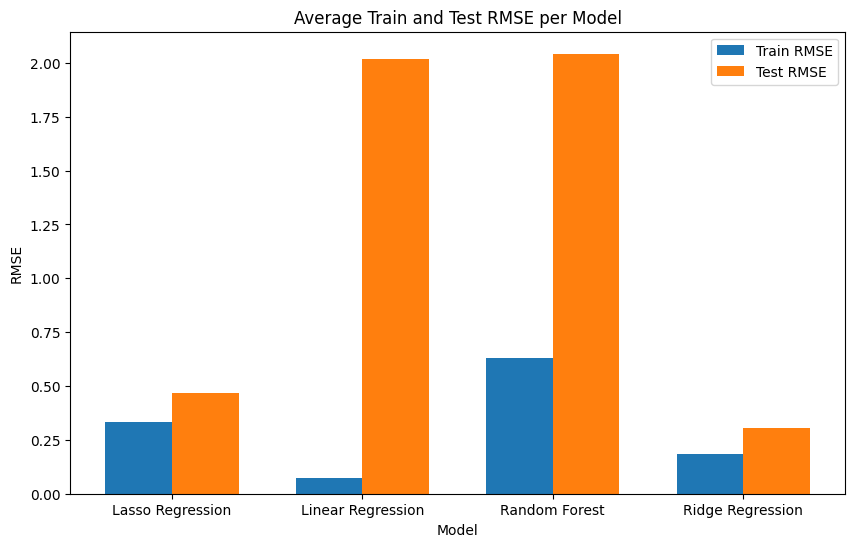

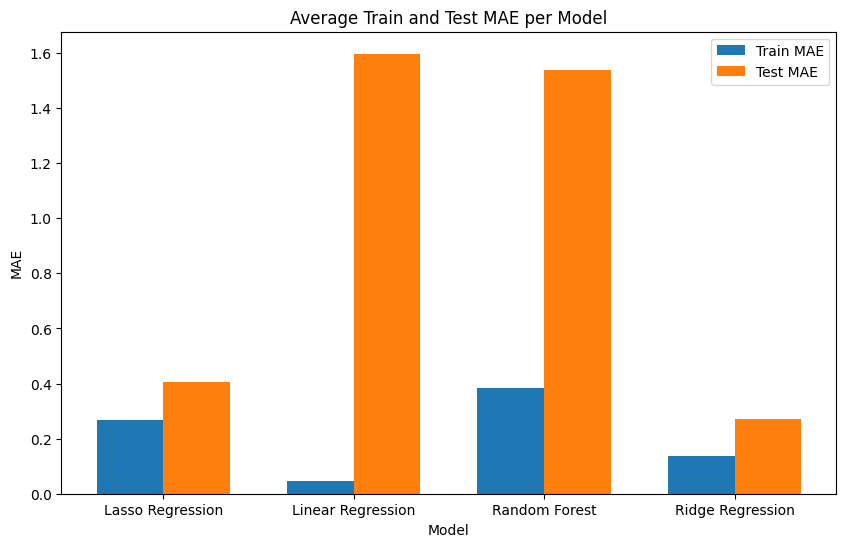

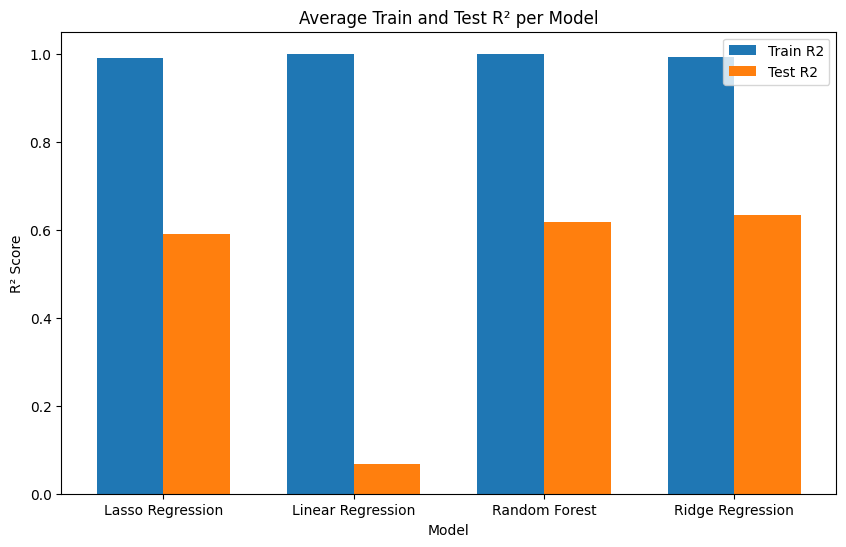

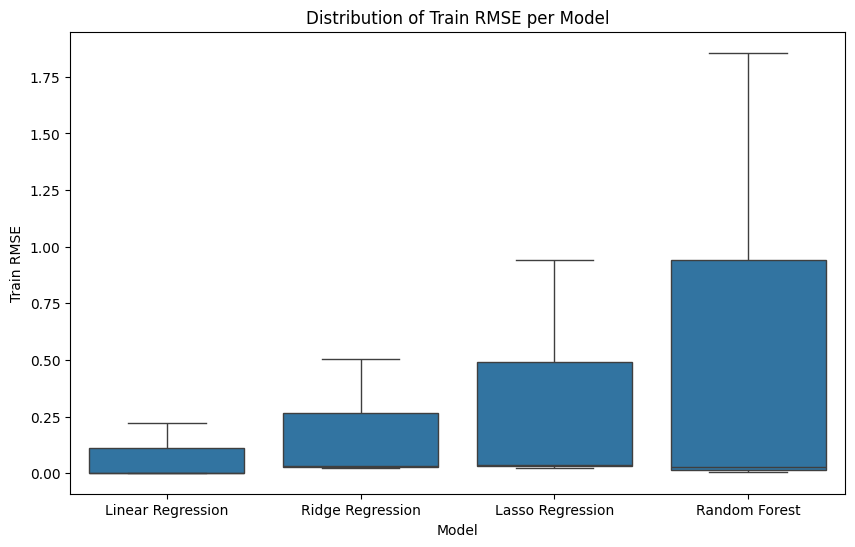

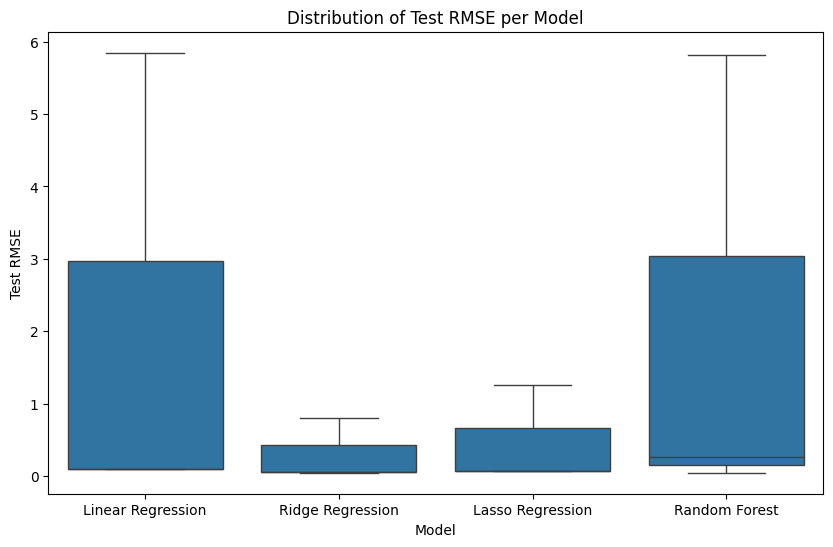

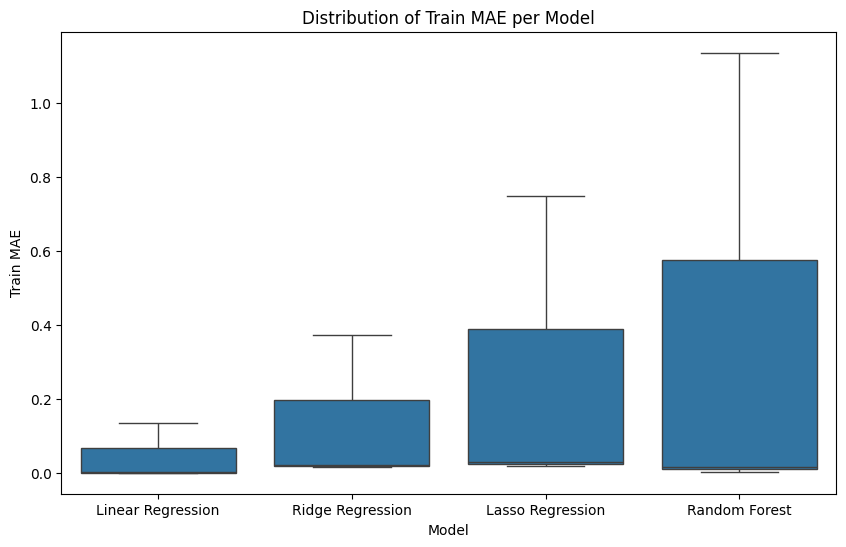

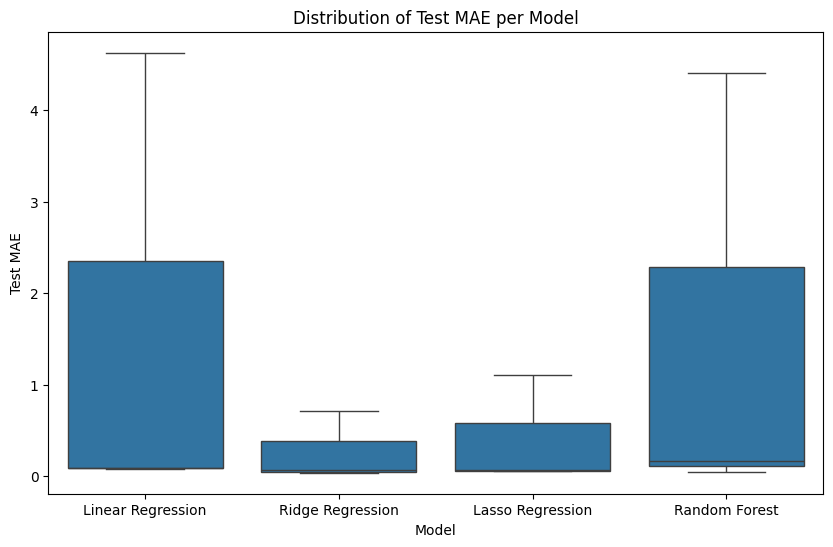

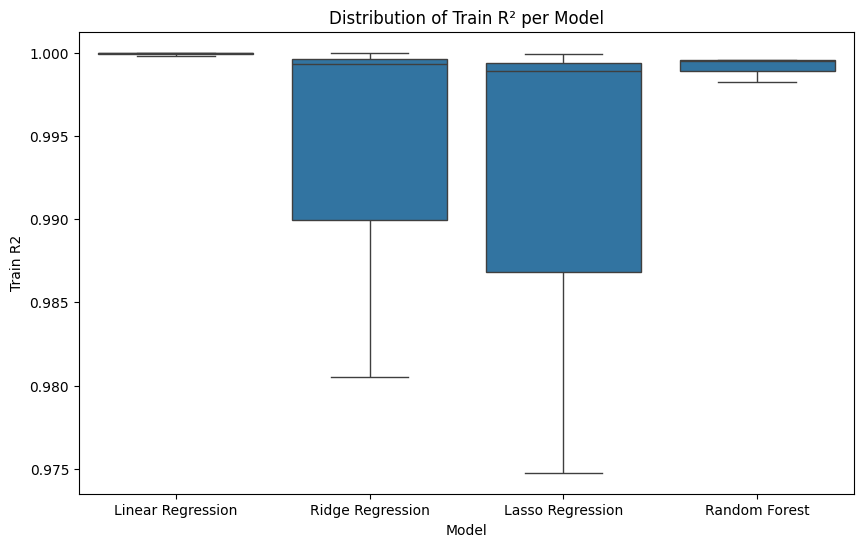

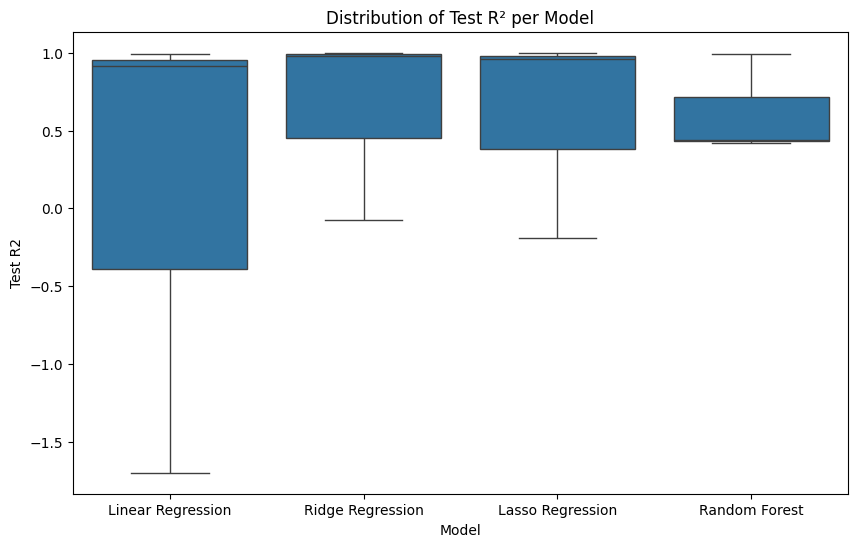

In [ ]:
# Charts/Graphs/Plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data from evaluation_results
data = []

for ticker in evaluation_results:
    for model_name in evaluation_results[ticker]:
        metrics = evaluation_results[ticker][model_name]
        data.append({
            'Ticker': ticker,
            'Model': model_name,
            'Train RMSE': metrics['Train RMSE'],
            'Test RMSE': metrics['Test RMSE'],
            'Train MAE': metrics['Train MAE'],
            'Test MAE': metrics['Test MAE'],
            'Train R2': metrics['Train R2'],
            'Test R2': metrics['Test R2']
        })


df_metrics = pd.DataFrame(data)
metrics_mean = df_metrics.groupby('Model').agg({'Train RMSE': 'mean', 'Test RMSE': 'mean',
                                               'Train MAE': 'mean', 'Test MAE': 'mean',
                                               'Train R2': 'mean', 'Test R2': 'mean'}).reset_index()

positions = np.arange(len(metrics_mean))
width = 0.35

# Bar chart for RMSE
plt.figure(figsize=(10,6))
plt.bar(positions - width/2, metrics_mean['Train RMSE'], width=width, label='Train RMSE')
plt.bar(positions + width/2, metrics_mean['Test RMSE'], width=width, label='Test RMSE')
plt.xticks(positions, metrics_mean['Model'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Average Train and Test RMSE per Model')
plt.legend()
plt.show()

# Bar chart for MAE
plt.figure(figsize=(10,6))
plt.bar(positions - width/2, metrics_mean['Train MAE'], width=width, label='Train MAE')
plt.bar(positions + width/2, metrics_mean['Test MAE'], width=width, label='Test MAE')
plt.xticks(positions, metrics_mean['Model'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Average Train and Test MAE per Model')
plt.legend()
plt.show()

# Bar chart for R2
plt.figure(figsize=(10,6))
plt.bar(positions - width/2, metrics_mean['Train R2'], width=width, label='Train R2')
plt.bar(positions + width/2, metrics_mean['Test R2'], width=width, label='Test R2')
plt.xticks(positions, metrics_mean['Model'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Average Train and Test R² per Model')
plt.legend()
plt.show()

# Box plots for RMSE
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Train RMSE', data=df_metrics)
plt.title('Distribution of Train RMSE per Model')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Test RMSE', data=df_metrics)
plt.title('Distribution of Test RMSE per Model')
plt.show()

# Box plots for MAE
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Train MAE', data=df_metrics)
plt.title('Distribution of Train MAE per Model')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Test MAE', data=df_metrics)
plt.title('Distribution of Test MAE per Model')
plt.show()

# Box plots for R²
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Train R2', data=df_metrics)
plt.title('Distribution of Train R² per Model')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Test R2', data=df_metrics)
plt.title('Distribution of Test R² per Model')
plt.show()


## Polynomial Regression Hyper Parameter Tuning Results
Hyper Parameter Tuning Analysis: When trying to find the most optimal model, one wants to minimze test RMSE and MAE, while maximizing test R2. Given the output averages produced from running on 1, 2 and 3 polynomial degree regressions and the bar charts/box plots produced, we can see that the first degree appears to be the best in all three categories. This displays that the linear model has the highest accuracy and least overfitting of the models, and would be our choice for the best. This may be due to the fact that our data is already normalized, which may have allowed the linear model to learn relationships without having to react poorly to large scale features. It would seem that adding extra orders introduce unneccessary complexity that leads to overfitting.

# New Models: Lasso and Ridge Regression

As stated above, we decided to go forward with linear regression. To tune our model even more, we used regularization in the forms of Lasso and Ridge Regression. The reason for this is primarily due to our understanding of what was causing overfitting in our prior polynomial regression models. The first thing we analyzed was the polynomial degree, as higher degrees can cause overfitting for polynomial functions. We recognized quickly that as our polynomial degree increased, our model's issues with overfitting became more severe. We determined that this could be attributed to a lack of regularization, as higher degree polynomials are prone to disproportionately large and oscillating coefficients. We know that while different, both Lasso and Ridge regression add a penalty term based on the magnitute and squared magnitute of the coefficients, respectively. Therefore, we chose to use Lasso and Ridge regression as we required these regularization techniques to deal with the overfitting issues.

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# hyperparameters to test (alpha values)
lasso_alphas = [0.01, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 1, 10, 100]
ridge_alphas = [0.01, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 1, 10, 100]

# to store our train and test RMSE results for different alpha values
lasso_results = {alpha: {'train_rmse': [], 'test_rmse': []} for alpha in lasso_alphas}
ridge_results = {alpha: {'train_rmse': [], 'test_rmse': []} for alpha in ridge_alphas}

for ticker in df['ticker'].unique():

    ticker_df = df[df['ticker'] == ticker].copy()

    # need to maintain chronological order (sort by date)
    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)

    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    # need to choronologically split data
    split_index = int(len(X) * 0.8)
    if split_index == 0:
        split_index = 1

    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    # feature expansion
    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.transform(X_test)

    # lasso regression for all alpha values
    for alpha in lasso_alphas:
        model = Lasso(alpha=alpha, max_iter=10000)
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # store RMSE results
        lasso_results[alpha]['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        lasso_results[alpha]['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # ridge regression for all alpha values
    for alpha in ridge_alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # store RMSE results
        ridge_results[alpha]['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        ridge_results[alpha]['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# need average RMSE and percent difference between train and test RMSE (to determine overfitting)
def calculate_avg_rmse_and_diff(results):
    return {
        alpha: {
            'avg_train_rmse': np.mean(r['train_rmse']),
            'avg_test_rmse': np.mean(r['test_rmse']),
            'percent_difference': 100 * abs(np.mean(r['train_rmse']) - np.mean(r['test_rmse'])) / np.mean(r['train_rmse'])
        }
        for alpha, r in results.items()
    }

avg_lasso_results = calculate_avg_rmse_and_diff(lasso_results)
avg_ridge_results = calculate_avg_rmse_and_diff(ridge_results)

# convert results to a dataframe
lasso_df = pd.DataFrame(avg_lasso_results).T.rename_axis('alpha').reset_index()
ridge_df = pd.DataFrame(avg_ridge_results).T.rename_axis('alpha').reset_index()

# results
print("Lasso Regression Results:")
print(lasso_df)
print("\n")
print("Ridge Regression Results:")
print(ridge_df)

Lasso Regression Results:
    alpha  avg_train_rmse  avg_test_rmse  percent_difference
0    0.01        0.084044       0.203547          142.191852
1    0.08        0.156786       0.381917          143.591583
2    0.10        0.166614       0.400316          140.265459
3    0.15        0.187331       0.432076          130.649115
4    0.20        0.205722       0.462211          124.677599
5    0.30        0.231175       0.504153          118.083236
6    0.40        0.247994       0.528747          113.209604
7    1.00        0.317992       0.609064           91.534639
8   10.00        0.656279       1.161600           76.997869
9  100.00        1.134538       1.727953           52.304523

Ridge Regression Results:
    alpha  avg_train_rmse  avg_test_rmse  percent_difference
0    0.01        0.029602       0.078534          165.302635
1    0.08        0.039026       0.090765          132.578794
2    0.10        0.040439       0.093777          131.900050
3    0.15        0.043214       

Here, we have used both Lasso and Ridge regression to make our 'close' price predictions. We focused on hyperparameter tuning for both models, carefully evaluating results based on many different alpha values, which controls regularization strength.

As we can see for Lasso regression, the difference in train and test RMSE goes down as we increase the regularization strength indicating reduced overfitting. However, this is at the cost of the model's ability to generalize and make accurate predictions for test data. The alpha value range with the best balance between overfitting and low test RMSE appears to be between 0.08 and 1.0, depending on which metric you value more. Given the copmlexity of our dataset, some degree of overfitting is not unexpected so we would choose to prioritize low test RMSE and lean towards an alpha value on the lower end of that range.

For Ridge regression, we see low correlation between an increased the alpha value and decreased overfitting. This could be because Ridge regression is less sensitive to changes in the regularization strength since it rarely sets coefficients to 0 like Lasso regression. Again, given the complexity of our dataset, some small degree of overfitting isn't expected, and we find the best balance between overfitting and low RMSE to be around .08 where we see a noticeable improvement in overfitting from 0.01, with a reasonably low test RMSE that is still well under 0.1.

We can observe these trends in the figures(graphs, charts, and plots) below:

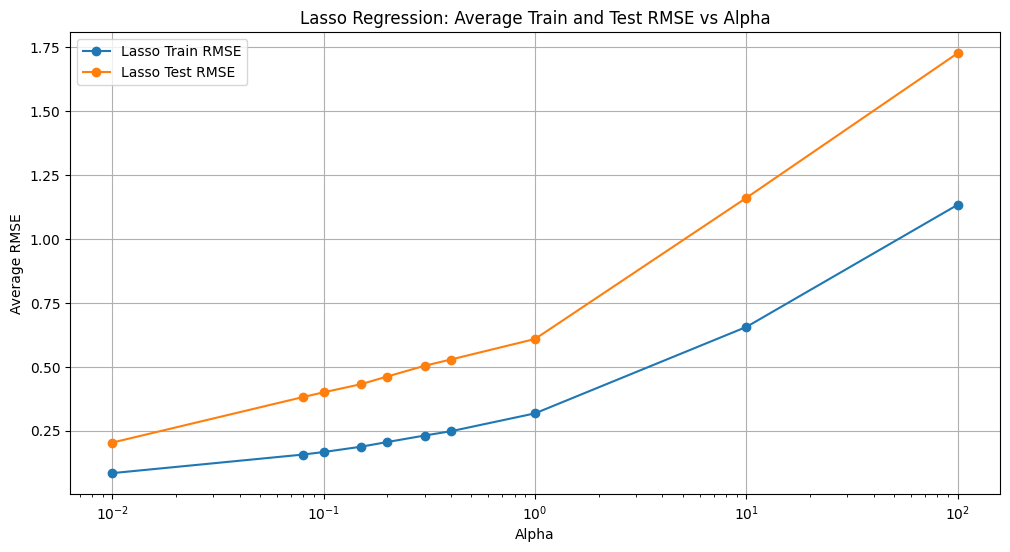

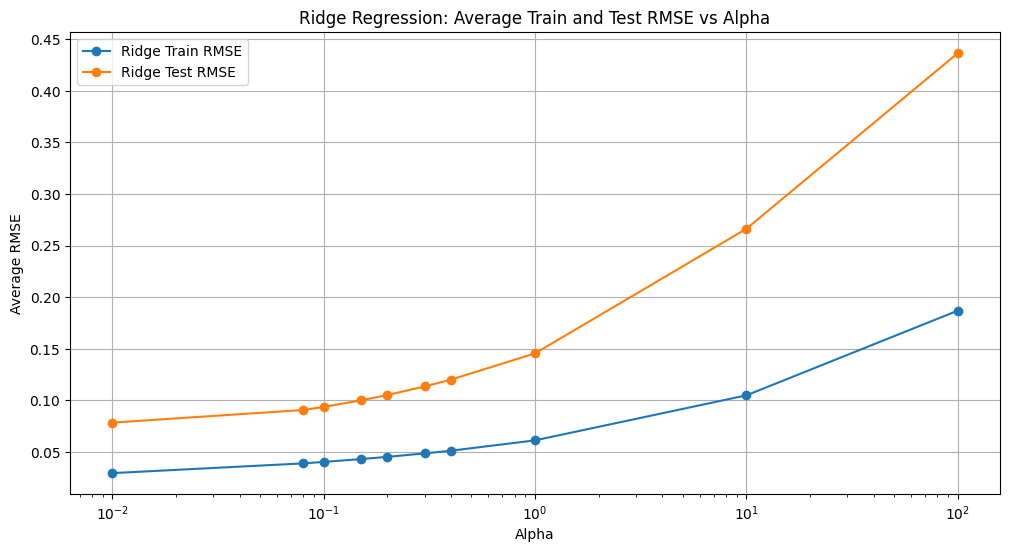

In [ ]:
import matplotlib.pyplot as plt

# Plot Lasso Regression results
plt.figure(figsize=(12, 6))
plt.plot(lasso_df['alpha'], lasso_df['avg_train_rmse'], label='Lasso Train RMSE', marker='x')
plt.plot(lasso_df['alpha'], lasso_df['avg_test_rmse'], label='Lasso Test RMSE', marker='x')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# Plot Ridge Regression results
plt.figure(figsize=(12, 6))
plt.plot(ridge_df['alpha'], ridge_df['avg_train_rmse'], label='Ridge Train RMSE', marker='o')
plt.plot(ridge_df['alpha'], ridge_df['avg_test_rmse'], label='Ridge Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

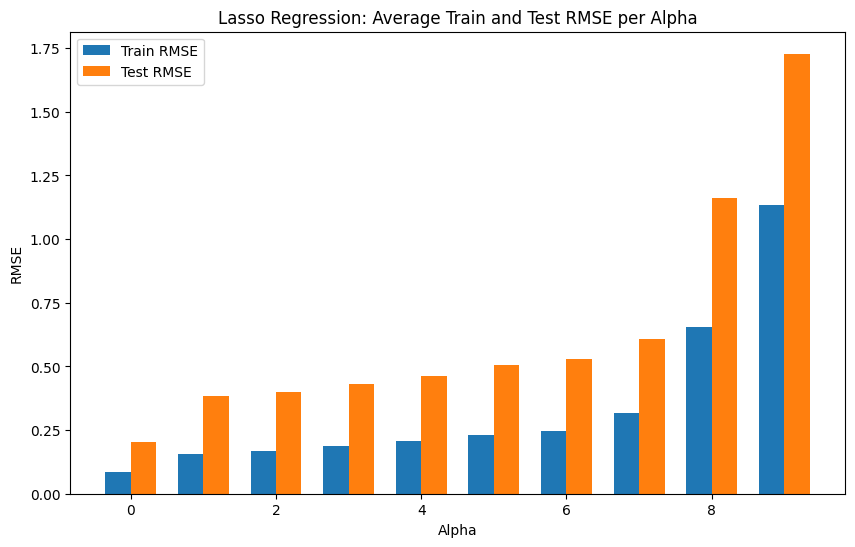

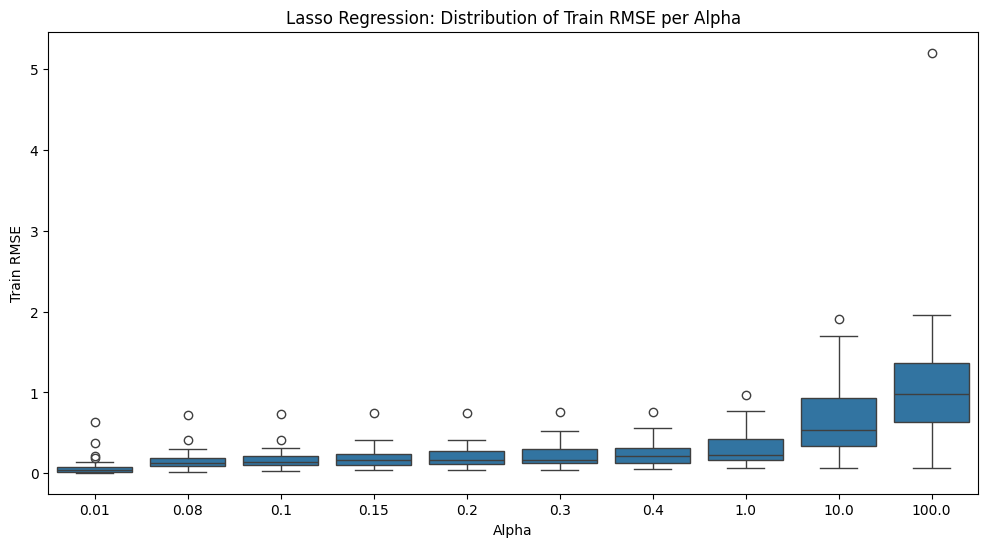

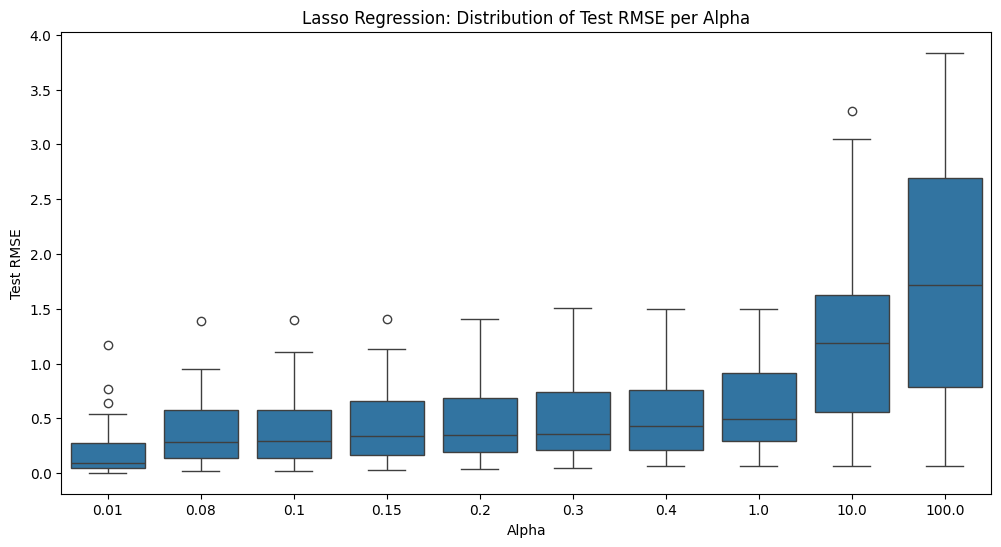

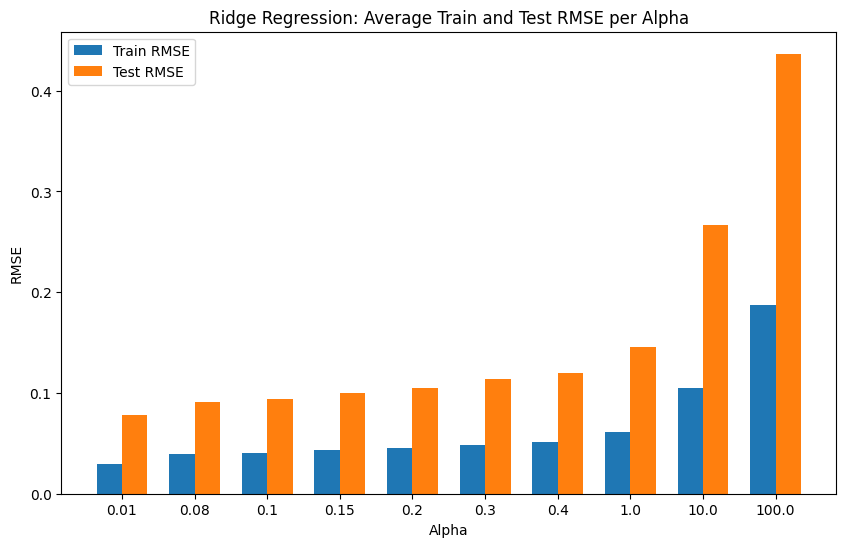

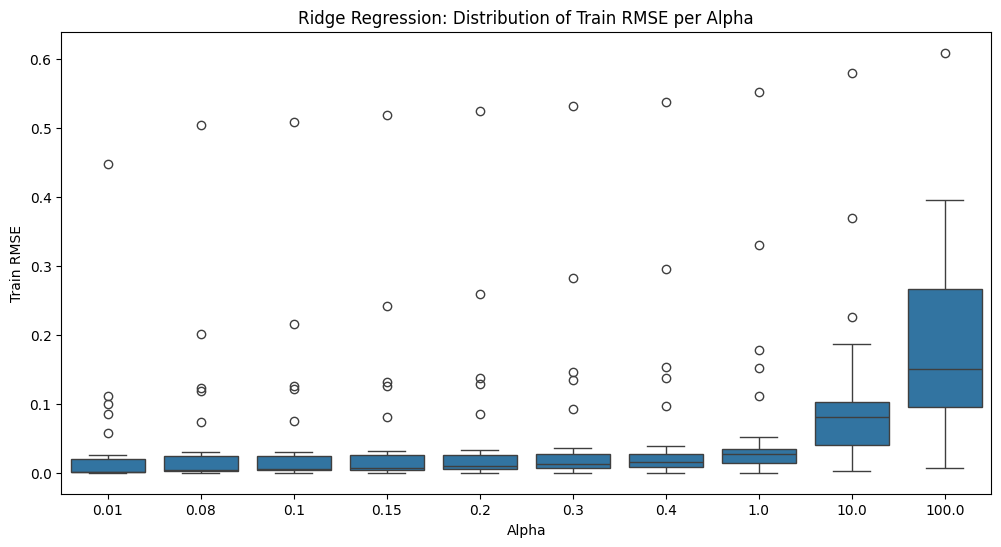

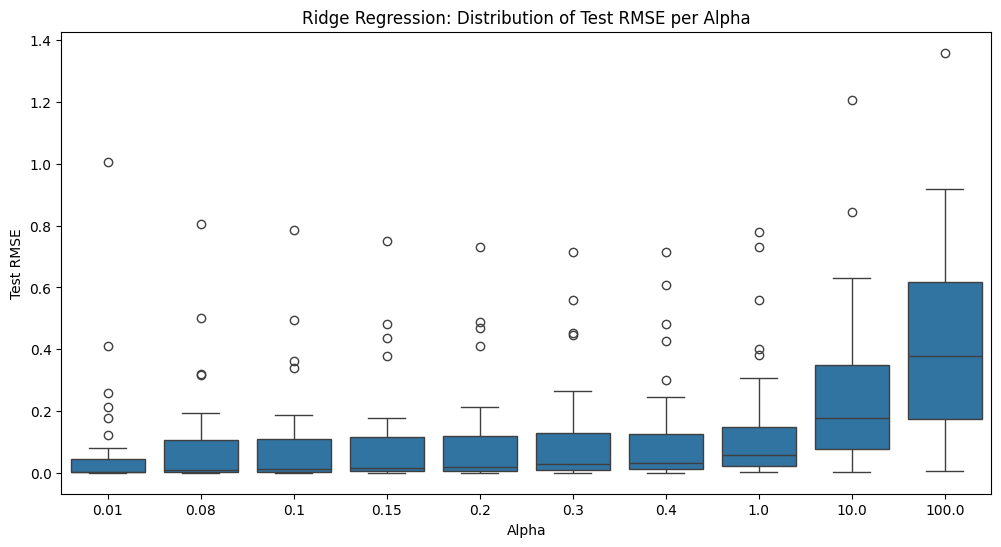

In [ ]:
# Charts/Graphs/Plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for Lasso Regression
lasso_data = []
for alpha in lasso_alphas:
    for train_rmse, test_rmse in zip(lasso_results[alpha]['train_rmse'], lasso_results[alpha]['test_rmse']):
        lasso_data.append({
            'Model': 'Lasso',
            'Alpha': alpha,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse
        })

# Prepare the data for Ridge Regression
ridge_data = []
for alpha in ridge_alphas:
    for train_rmse, test_rmse in zip(ridge_results[alpha]['train_rmse'], ridge_results[alpha]['test_rmse']):
        ridge_data.append({
            'Model': 'Ridge',
            'Alpha': alpha,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse
        })
df_lasso = pd.DataFrame(lasso_data)
df_ridge = pd.DataFrame(ridge_data)
df_all = pd.concat([df_lasso, df_ridge], ignore_index=True)

#Avg Train and Test RMSE per Alpha for Lasso Regression
lasso_avg_rmse = df_lasso.groupby('Alpha')[['Train RMSE', 'Test RMSE']].mean().reset_index()

plt.figure(figsize=(10,6))
positions = np.arange(len(lasso_avg_rmse))
width = 0.35
plt.bar(positions - width/2, lasso_avg_rmse['Train RMSE'], width=width, label='Train RMSE')
plt.bar(positions + width/2, lasso_avg_rmse['Test RMSE'], width=width, label='Test RMSE')
ridge_avg_rmse = df_ridge.groupby('Alpha')[['Train RMSE', 'Test RMSE']].mean().reset_index()
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Lasso Regression: Avg Train and Test RMSE per Alpha')
plt.legend()
plt.show()

#Distribution of Train and Test RMSE per Alpha for Lasso Regression
plt.figure(figsize=(12,6))
sns.boxplot(x='Alpha', y='Train RMSE', data=df_lasso)
plt.title('Lasso Regression: Distrib of Train RMSE per Alpha')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Alpha', y='Test RMSE', data=df_lasso)
plt.title('Lasso Regression: Distrib of Test RMSE per Alpha')
plt.show()

# Average Train and Test RMSE per Alpha for Ridge Regression
ridge_avg_rmse = df_ridge.groupby('Alpha')[['Train RMSE', 'Test RMSE']].mean().reset_index()

plt.figure(figsize=(10,6))
positions = np.arange(len(ridge_avg_rmse))
width = 0.35
plt.bar(positions - width/2, ridge_avg_rmse['Train RMSE'], width=width, label='Train RMSE')
plt.bar(positions + width/2, ridge_avg_rmse['Test RMSE'], width=width, label='Test RMSE')
plt.xticks(positions, ridge_avg_rmse['Alpha']) # Set x-axis ticks to Alpha values
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression: Avg Train and Test RMSE per Alpha')
plt.legend()
plt.show()

#Distrib of Train and Test RMSE per Alpha for Ridge Regression
plt.figure(figsize=(12,6))
sns.boxplot(x='Alpha', y='Train RMSE', data=df_ridge)
plt.title('Ridge Regression: Distrib of Train RMSE per Alpha')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Alpha', y='Test RMSE', data=df_ridge)
plt.title('Ridge Regression: Distrib of Test RMSE per Alpha')
plt.show()

# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto']
}

# Initialize results storage
hyperparameter_results = []

# Loop over all tickers in the dataset
for ticker in df['ticker'].unique():
    # Filter dataset for the current ticker
    ticker_df = df[df['ticker'] == ticker].copy()

    # Sort by date for chronological splitting
    ticker_df = ticker_df.sort_values('date').reset_index(drop=True)

    # Define features and target
    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    # Train-Test split (80/20 chronological split)
    split_index = int(len(X) * 0.8)
    if split_index == 0:
        continue  # Skip if not enough data for train-test split
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    # Feature scaling (SVR is sensitive to feature scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Cross-validation with TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    # Iterate over all combinations of hyperparameters
    for kernel in param_grid['kernel']:
        for C in param_grid['C']:
            for epsilon in param_grid['epsilon']:
                for gamma in param_grid['gamma']:
                    svr = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)

                    # Cross-validation scores
                    try:
                        cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=tscv, scoring='r2')
                        svr.fit(X_train_scaled, y_train)

                        # Predictions
                        y_train_pred = svr.predict(X_train_scaled)
                        y_test_pred = svr.predict(X_test_scaled)

                        # Metrics Calculation
                        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
                        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                        train_r2 = r2_score(y_train, y_train_pred)
                        test_r2 = r2_score(y_test, y_test_pred)
                        cv_mean_r2 = np.mean(cv_scores)

                        # Store results
                        hyperparameter_results.append({
                            'kernel': kernel,
                            'C': C,
                            'epsilon': epsilon,
                            'gamma': gamma,
                            'train_rmse': train_rmse,
                            'test_rmse': test_rmse,
                            'train_r2': train_r2,
                            'test_r2': test_r2,
                            'cv_mean_r2': cv_mean_r2
                        })
                    except Exception as e:
                        # Skip invalid parameter combinations
                        print(f"Error for {kernel}, C={C}, epsilon={epsilon}, gamma={gamma}: {e}")

# Convert results to DataFrame
hyperparameter_df = pd.DataFrame(hyperparameter_results)

# Calculate average metrics for each hyperparameter combination
average_results = (
    hyperparameter_df.groupby(['kernel', 'C', 'epsilon', 'gamma'])
    .mean()[['train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'cv_mean_r2']]
    .reset_index()
)

# Print results
print("Average SVR Results Across All Tickers for Each Hyperparameter Combination:")
print(average_results)

# Save results to a CSV for further analysis if needed
average_results.to_csv("svr_average_hyperparameter_results.csv", index=False)


Average SVR Results Across All Tickers for Each Hyperparameter Combination:
    kernel      C  epsilon  gamma  train_rmse  test_rmse  train_r2    test_r2  \
0   linear    0.1     0.01   auto    1.111211   0.917245  0.993505   0.943023   
1   linear    0.1     0.01  scale    1.111211   0.917245  0.993505   0.943023   
2   linear    0.1     0.10   auto    1.140740   0.958384  0.961856   0.526636   
3   linear    0.1     0.10  scale    1.140740   0.958384  0.961856   0.526636   
4   linear    0.1     1.00   auto    1.483344   1.416875  0.422240 -52.256164   
..     ...    ...      ...    ...         ...        ...       ...        ...   
67     rbf  100.0     0.01  scale    0.132823   1.098994  0.999365  -1.423880   
68     rbf  100.0     0.10   auto    0.182378   1.241071  0.965047  -2.680366   
69     rbf  100.0     0.10  scale    0.182378   1.241071  0.965047  -2.680366   
70     rbf  100.0     1.00   auto    0.620019   1.761308  0.410558 -60.117438   
71     rbf  100.0     1.00  scale

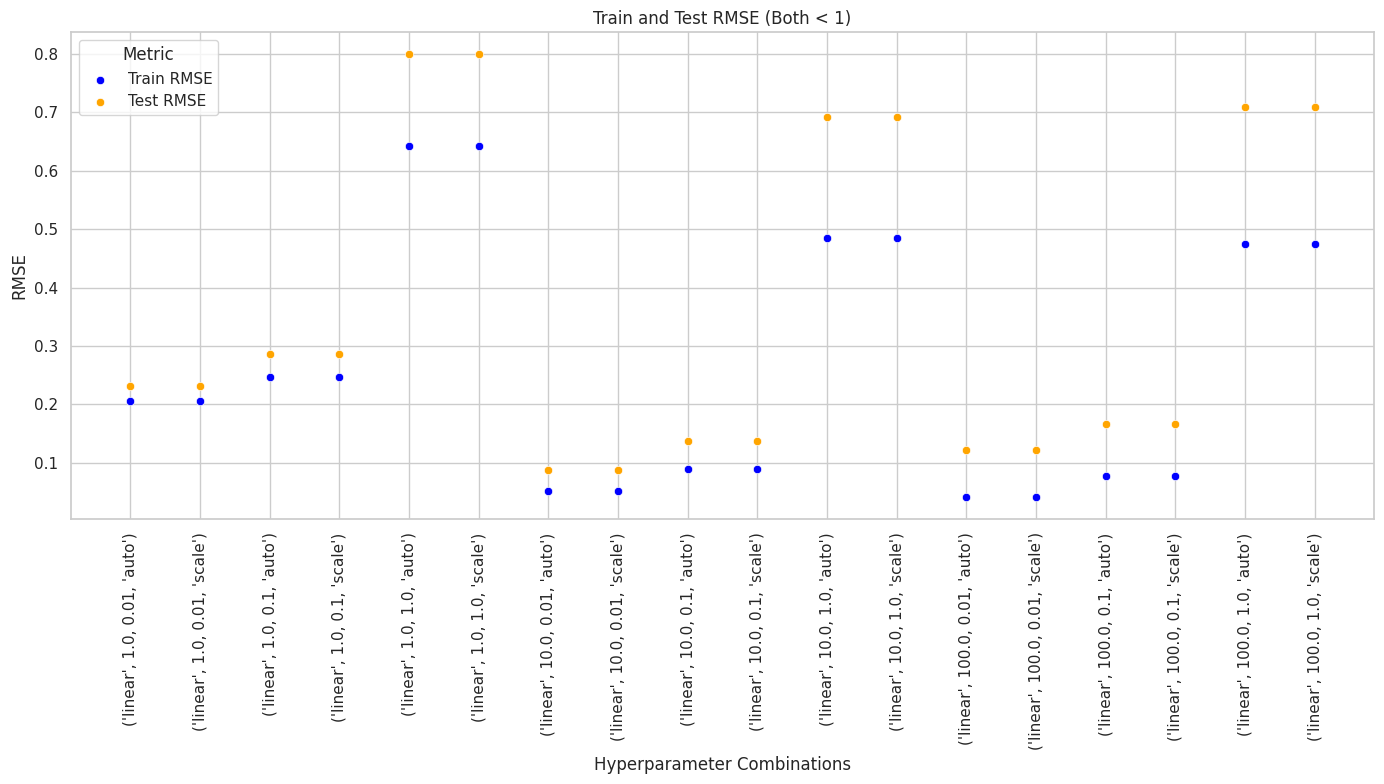

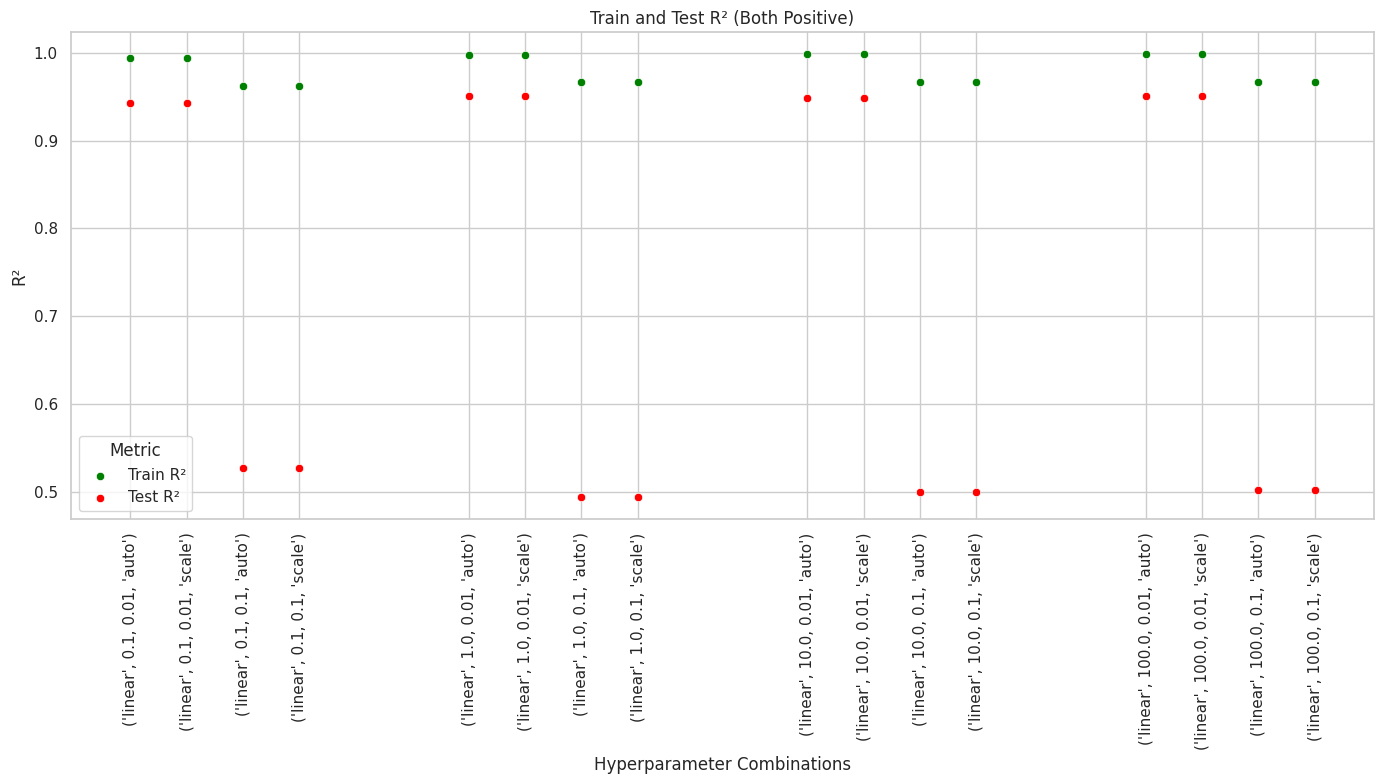

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Filter data for RMSE plot
rmse_filtered = average_results[
    (average_results['train_rmse'] < 1) & (average_results['test_rmse'] < 1)
]

# Plot Train and Test RMSE
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=rmse_filtered.index,
    y=rmse_filtered['train_rmse'],
    label='Train RMSE',
    color='blue',
    marker='o'
)
sns.scatterplot(
    x=rmse_filtered.index,
    y=rmse_filtered['test_rmse'],
    label='Test RMSE',
    color='orange',
    marker='o'
)
plt.xticks(
    rmse_filtered.index,
    rmse_filtered[['kernel', 'C', 'epsilon', 'gamma']].apply(tuple, axis=1),
    rotation=90
)
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("RMSE")
plt.title("Train and Test RMSE (Both < 1)")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Filter data for R² plot
r2_filtered = average_results[
    (average_results['train_r2'] > 0) & (average_results['test_r2'] > 0)
]

# Plot Train and Test R²
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=r2_filtered.index,
    y=r2_filtered['train_r2'],
    label='Train R²',
    color='green',
    marker='o'
)
sns.scatterplot(
    x=r2_filtered.index,
    y=r2_filtered['test_r2'],
    label='Test R²',
    color='red',
    marker='o'
)
plt.xticks(
    r2_filtered.index,
    r2_filtered[['kernel', 'C', 'epsilon', 'gamma']].apply(tuple, axis=1),
    rotation=90
)
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("R²")
plt.title("Train and Test R² (Both Positive)")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


# Model Comparisons (Fitting Graphs, Bar Charts, etc)

In this section, we take what we learned above and compare all the models we tuned (linear, lasso, and ridge) and compare them a hyper parameter tuned Random Forest Model to generate fitting graphs that represent how well our models performed compared to each other post tuning and print out bar charts for a more visual experience in regards to 3 randomly specified tickers. As we can see, Lasso and Ridge regression severely outperform the other models like linear regression, random forest, and the SVR model we trained above.

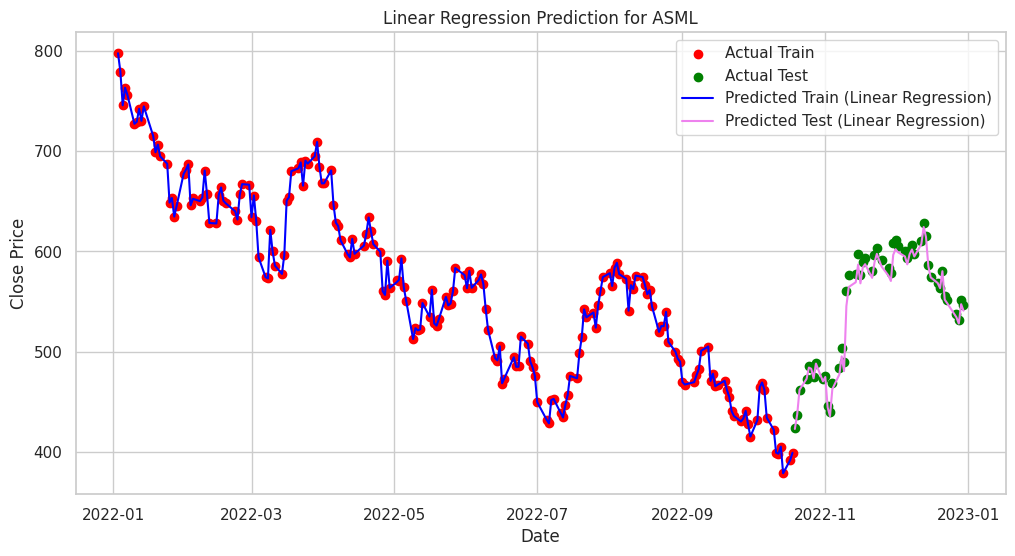

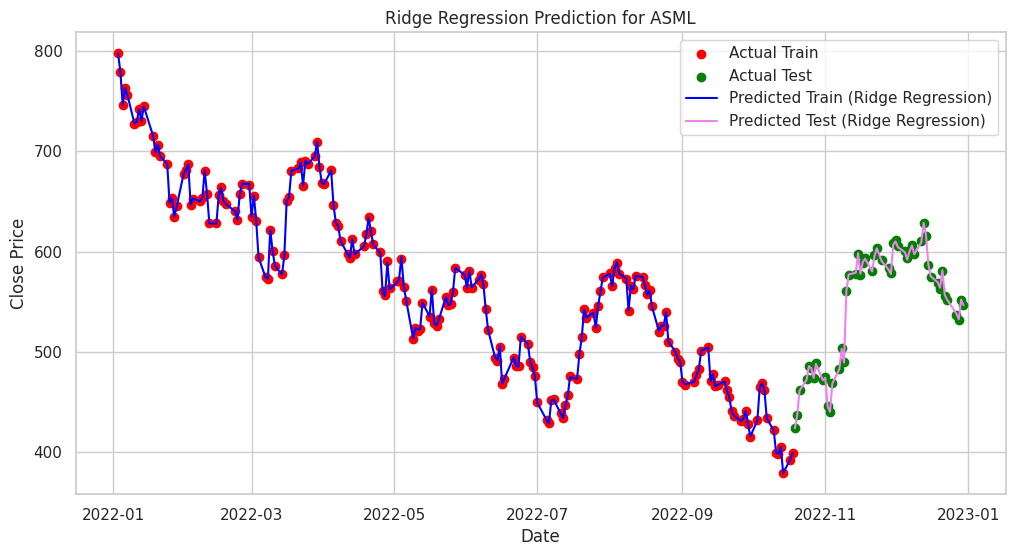

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+02, tolerance: 1.669e+02
  model = cd_fast.enet_coordinate_descent(


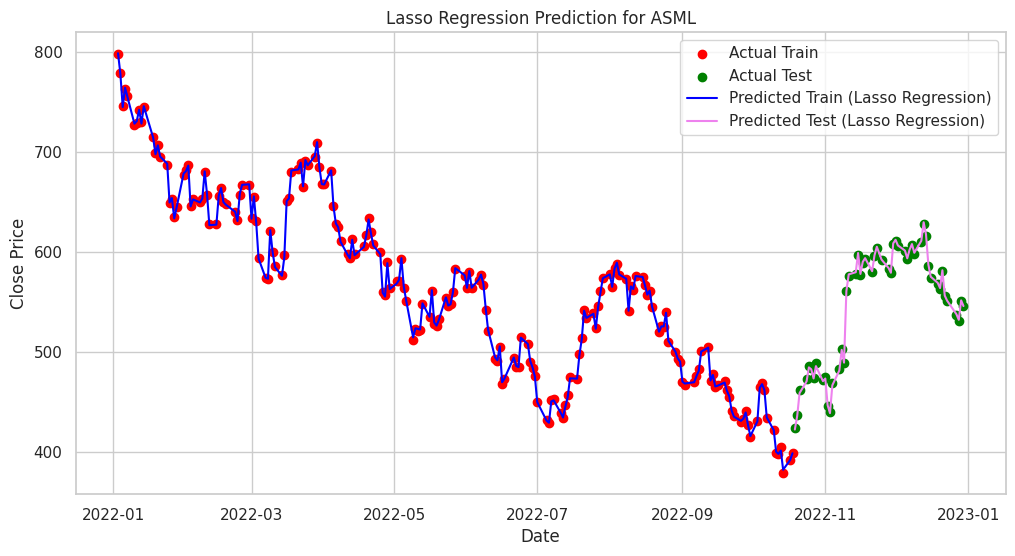

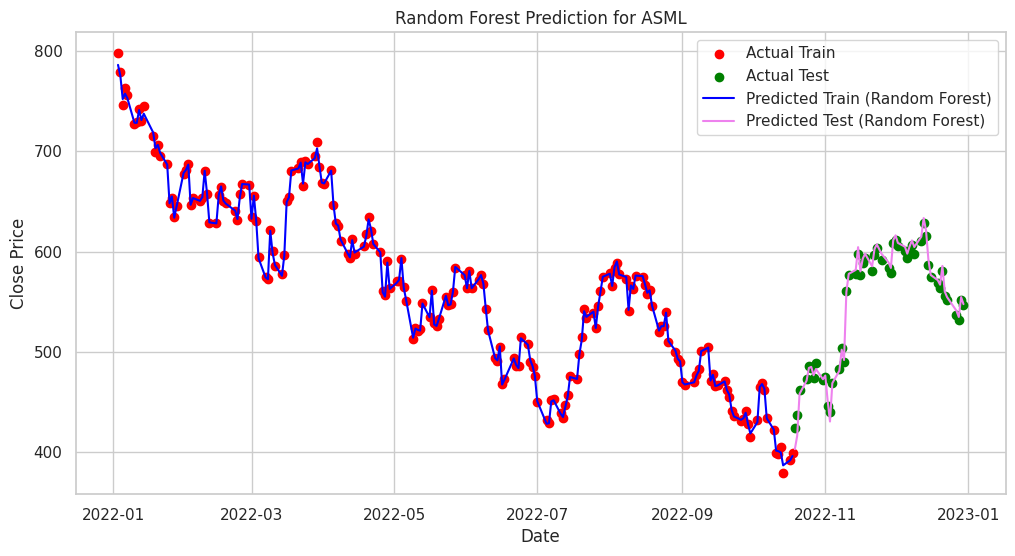

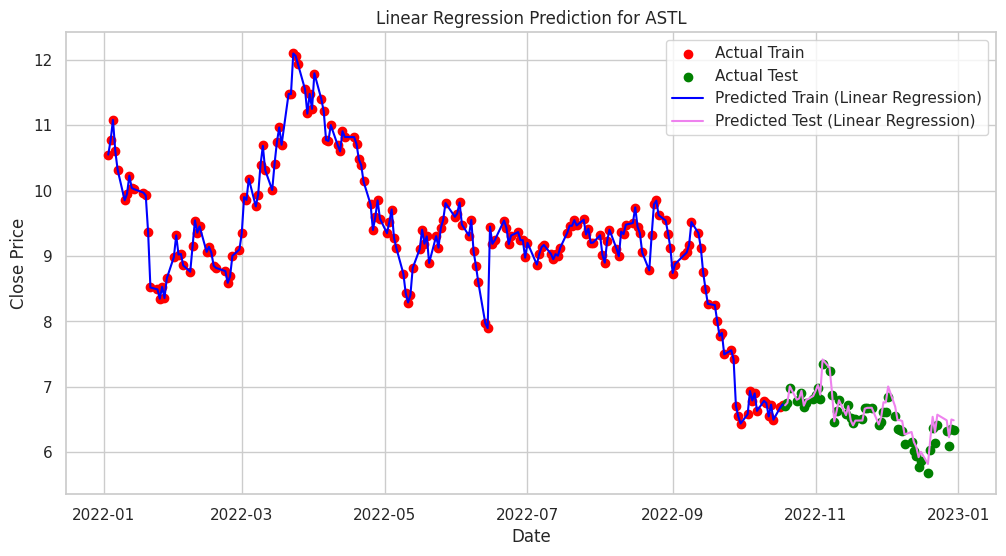

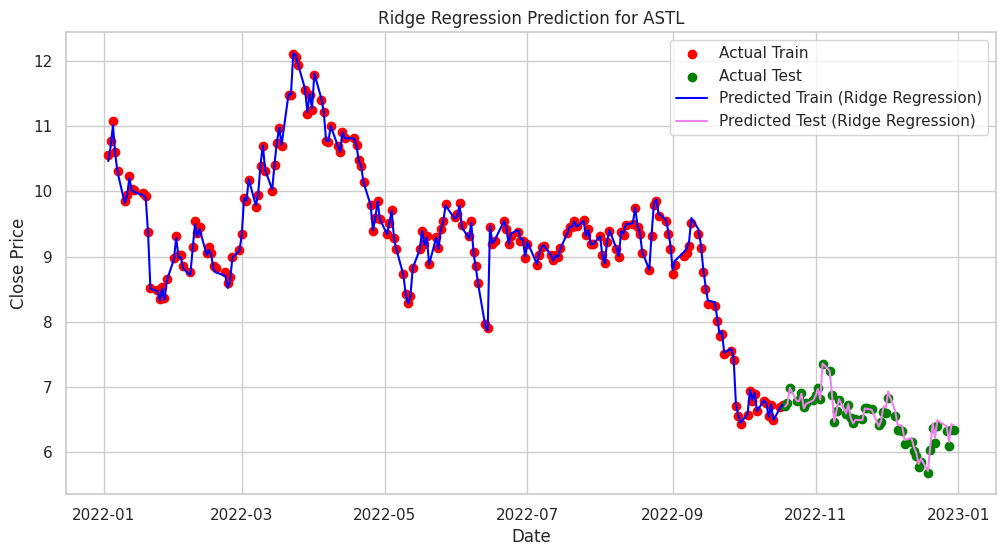

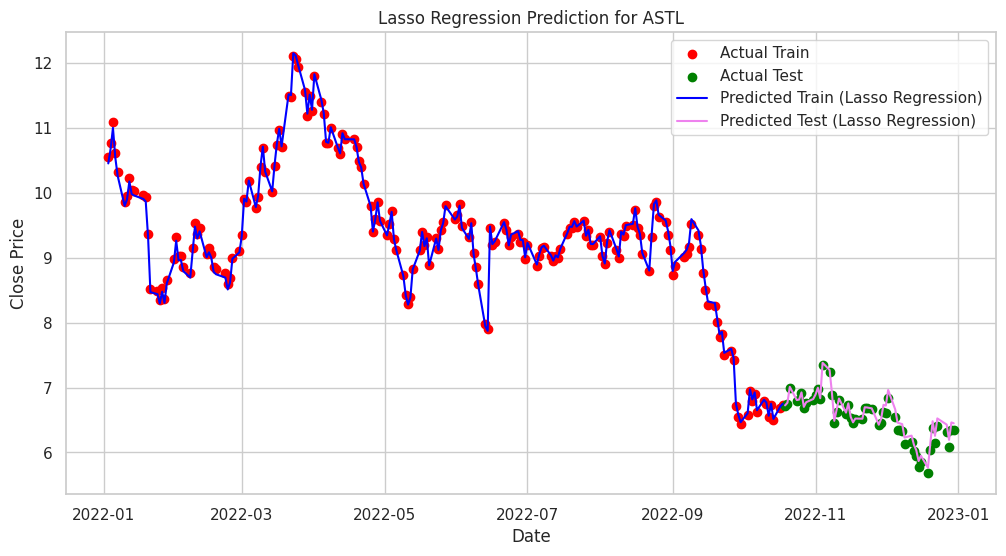

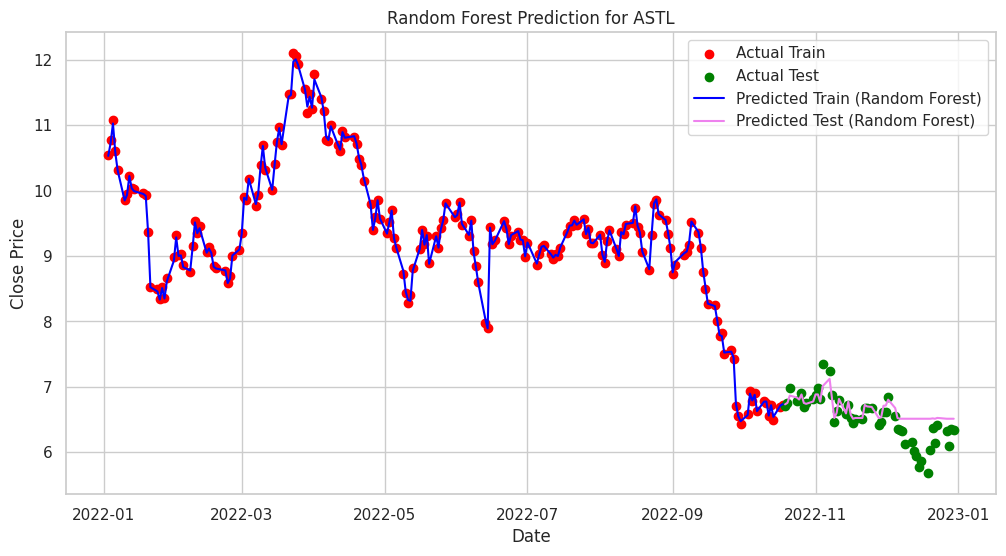

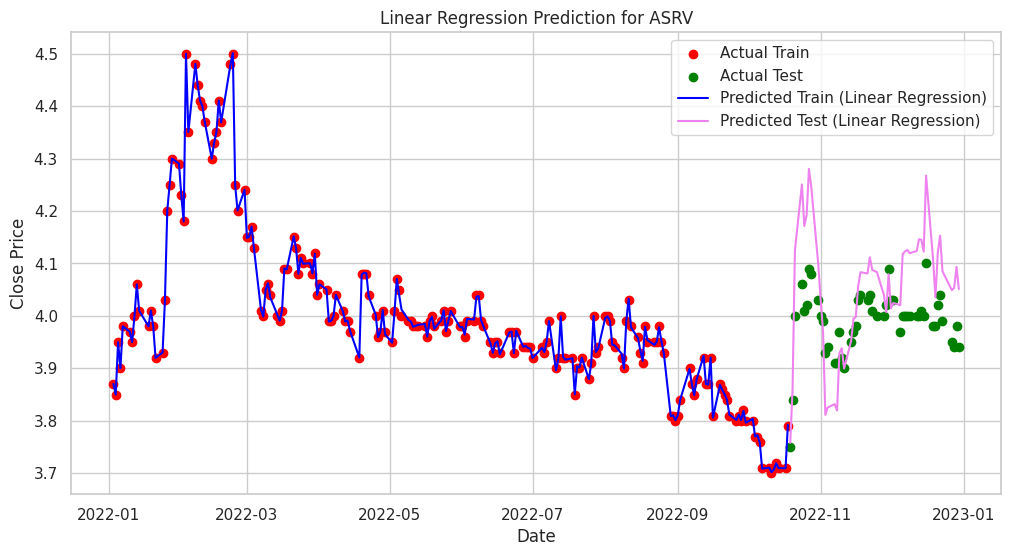

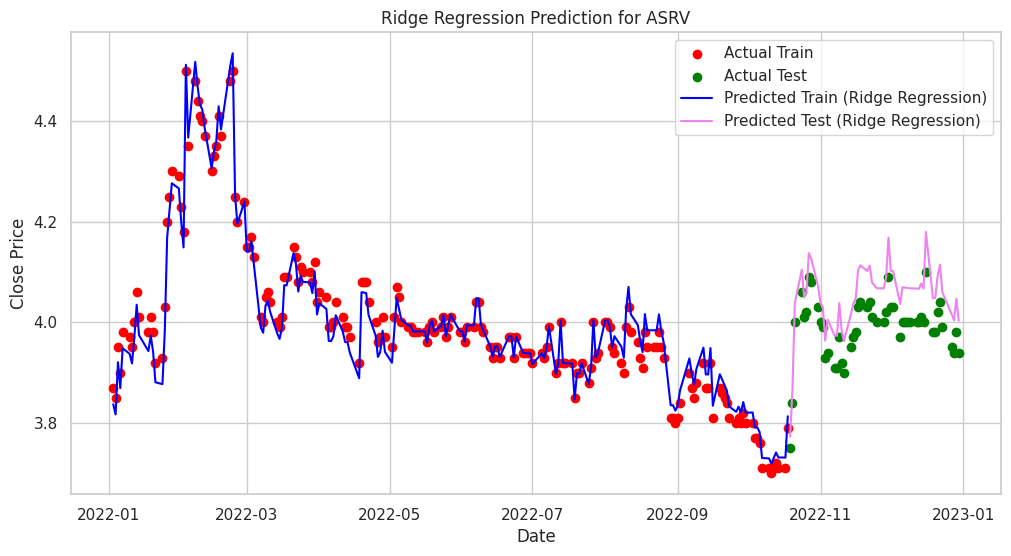

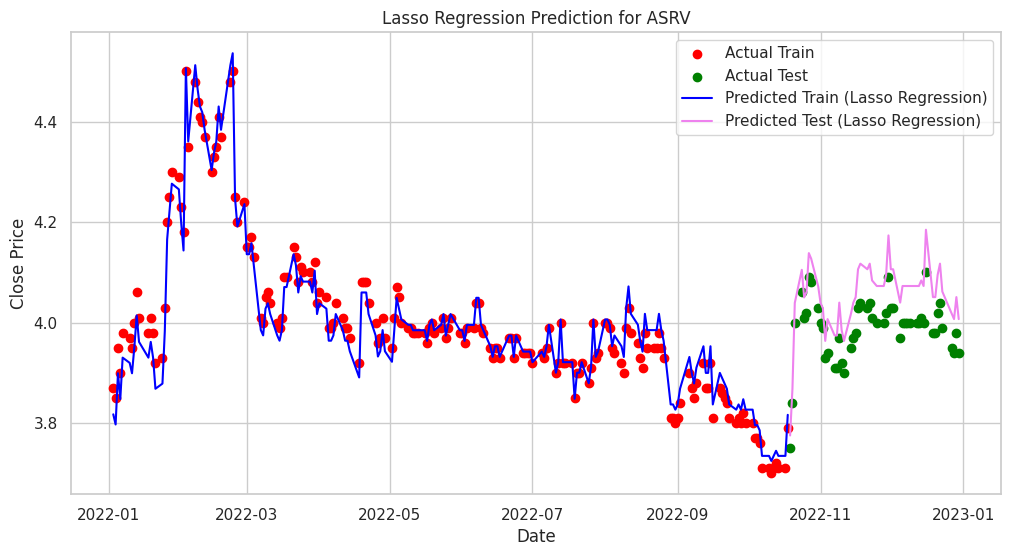

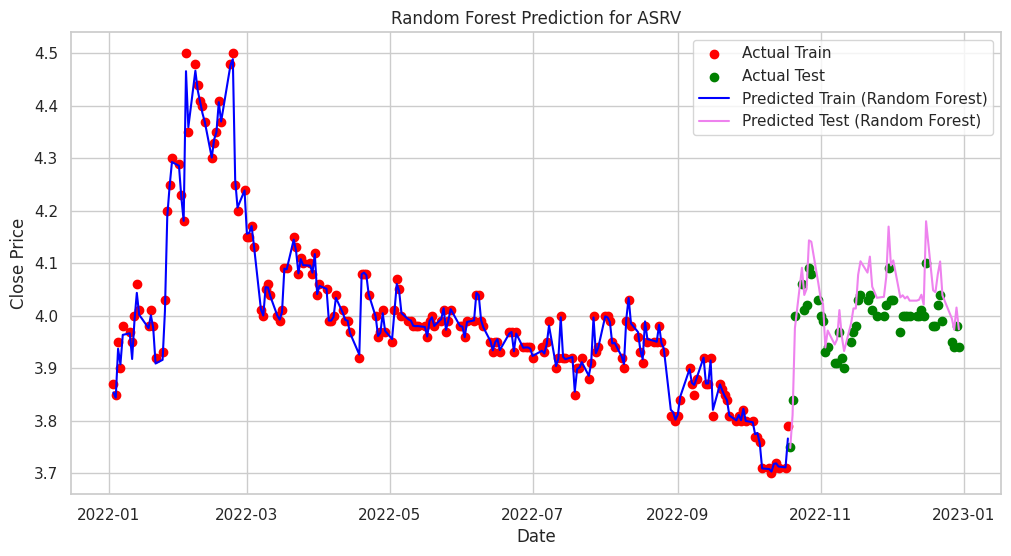

In [ ]:
# Initializing Models, Lists, and Variables
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.08),
    'Lasso Regression': Lasso(alpha=0.001),
    'Random Forest': RandomForestRegressor(random_state=23)
}

evaluation_results = {}
mse_train_list = {}
mse_test_list = {}

# Subset of companies to plot
selected_tickers = ['ASML', 'ASTL', 'ASRV']

# Generates Models and Graphs For All Selected Tickers
for ticker in selected_tickers:
    # Filter dataset for the current ticker
    ticker_df = df[df['ticker'] == ticker].copy()

    # Sort data by date
    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)

    # Splitting data
    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    # Split data chronologically
    split_index = int(len(X) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    # Feature Expansion
    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.transform(X_test)

    mse_train = {}
    mse_test = {}

    for model_name, model in models.items():
        if model_name == 'Random Forest':
            X_train_model = X_train
            X_test_model = X_test
        else:
            X_train_model = X_train_poly
            X_test_model = X_test_poly

        # HYPER PARAMETER TUNING
        if model_name == 'Random Forest':
            param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]}
            grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
            grid_search.fit(X_train_model, y_train)
            model = grid_search.best_estimator_
        else:
            model.fit(X_train_model, y_train)

        # MODEL TRAINING AND EVALUATION STUFF
        y_train_pred = model.predict(X_train_model)
        y_test_pred = model.predict(X_test_model)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        if ticker not in evaluation_results:
            evaluation_results[ticker] = {}
        evaluation_results[ticker][model_name] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Train MAE": train_mae,
            "Test MAE": test_mae,
            "Train R2": train_r2,
            "Test R2": test_r2
        }

        mse_train[model_name] = train_mse
        mse_test[model_name] = test_mse

        # Plot
        plt.figure(figsize=(12, 6))
        plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red')
        plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green')
        plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred, label=f'Predicted Train ({model_name})', color='blue')
        plt.plot(ticker_df['date'].iloc[split_index:], y_test_pred, label=f'Predicted Test ({model_name})', color='violet')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.title(f"{model_name} Prediction for {ticker}")
        plt.legend()
        plt.show()

    # Store MSE values for plotting
    mse_train_list[ticker] = mse_train
    mse_test_list[ticker] = mse_test


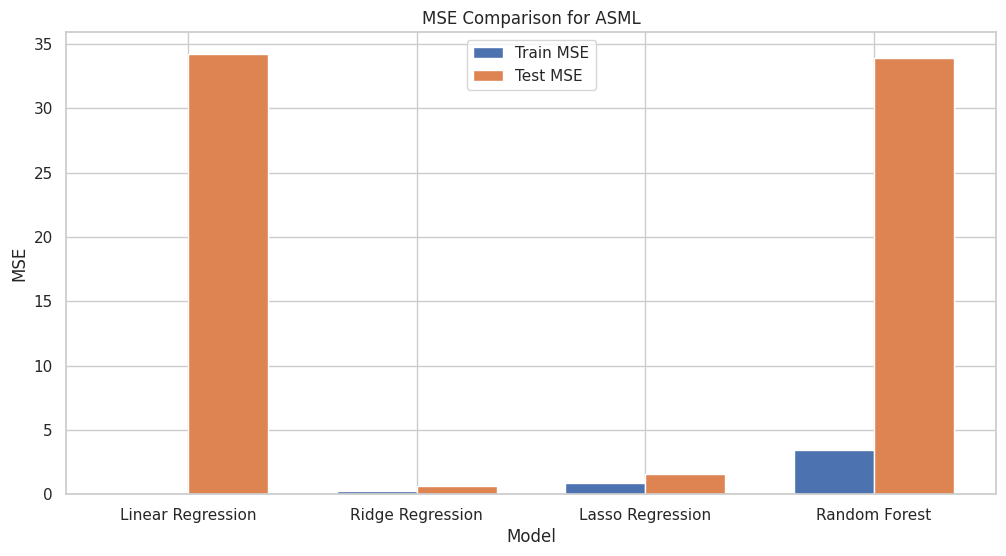

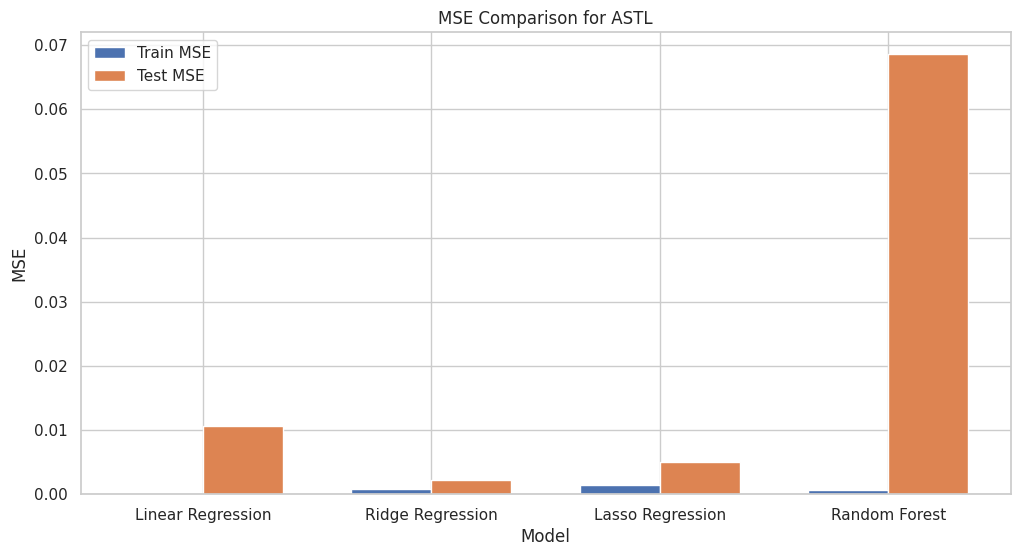

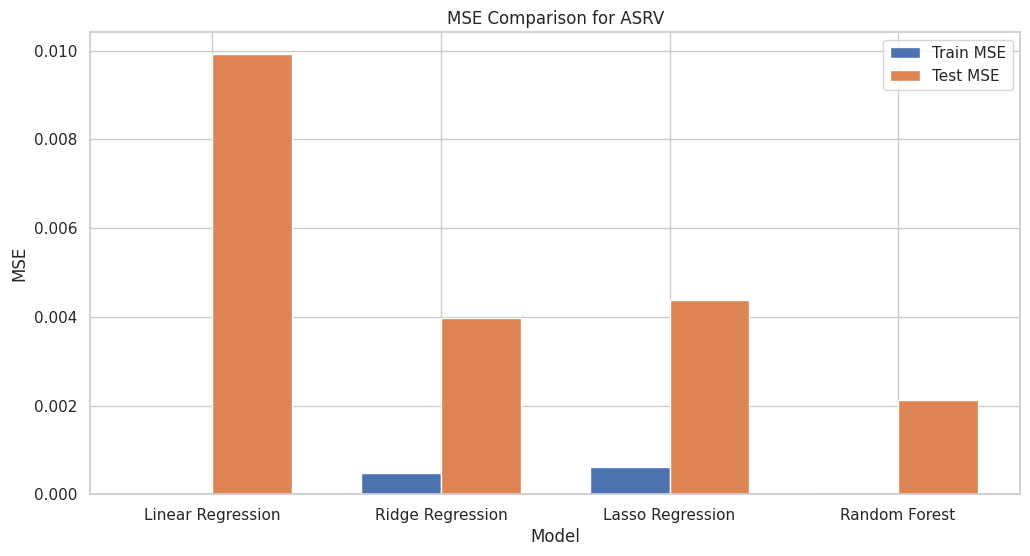

In [ ]:
# MSE Plot to Indicate Overfitting/Underfitting
for ticker in selected_tickers:
    if ticker not in mse_train_list:
        continue
    train_mse_values = list(mse_train_list[ticker].values())
    test_mse_values = list(mse_test_list[ticker].values())
    model_names = list(mse_train_list[ticker].keys())

    x = np.arange(len(model_names))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, train_mse_values, width, label='Train MSE')
    plt.bar(x + width/2, test_mse_values, width, label='Test MSE')

    plt.xlabel('Model')
    plt.ylabel('MSE')
    plt.title(f'MSE Comparison for {ticker}')
    plt.xticks(x, model_names)
    plt.legend()
    plt.show()

Sources:
ChatGPT:
For graphing we referenced chatGPT in order to aid us in creating graphs that could accurately and aesthetically represent what we wanted to see in our data. This was for the syntax of the graphs that we already had.

We also referenced some documentation for GridSearchCV as this was a newer process to us. Because we didn’t learn it in lecture, we were not familiar with the syntax and context.

Prompts Include:
1) Provide documentation for GridSearchCV and what the parameters mean.
2) How can we use plt to plot graphs and provide documentation.
3) Provide documentation for Random Forest and SVR regression.